<a href="https://colab.research.google.com/github/Nurhanifah99/PCVK_GENAP_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

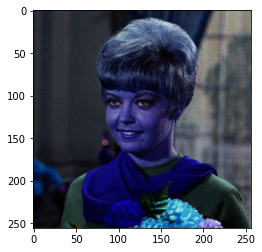

In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff')
plt.imshow(img)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai Kecerahan: 50


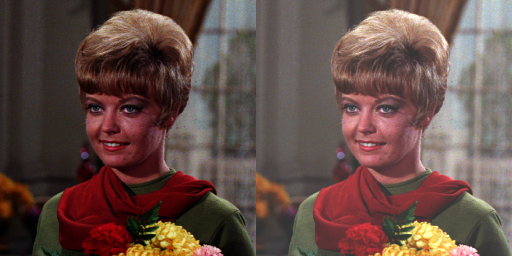

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai Kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan [-255 - 255]: 60
Masukan kontras [1.0 - 3.0]: 1.5


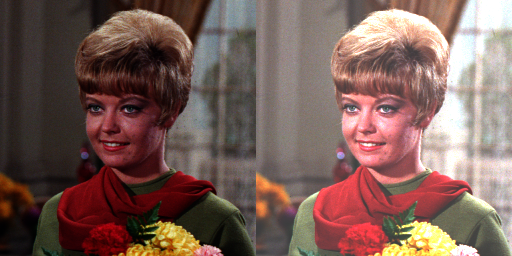

In [ ]:
# No.1
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukan kontras [1.0 - 3.0]: ' ))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, -255, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukan nilai kecerahan: 40


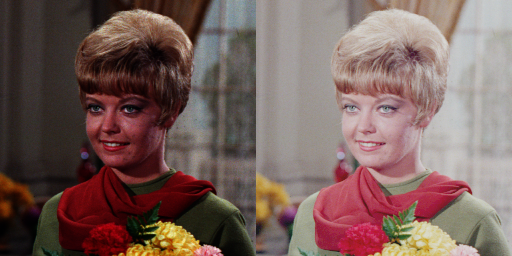

In [19]:
# No.2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * math.log(original[y,x,c] + 1), -255, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

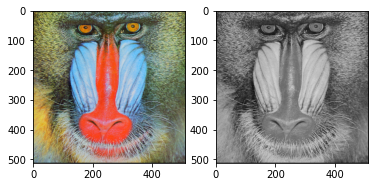

In [ ]:
# No.3 Averaging
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

grayscale_image = np.zeros(original.shape, original.dtype)

grayscale_image[:] = original.mean(axis=-1,keepdims=1) 

f = plt.figure()

f.add_subplot(1,2, 1)
plt.imshow(original)

f.add_subplot(1,2, 2)
plt.imshow(grayscale_image)

plt.show(block=True)

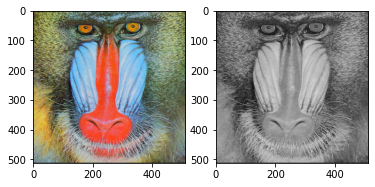

In [ ]:
# No.3 Lightness
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

grayscale_image = np.zeros(original.shape, original.dtype)

grayscale_image[:] = np.max(original,axis=-1,keepdims=1)/2+np.min(original,axis=-1,keepdims=1)/2

f = plt.figure()

f.add_subplot(1,2, 1)
plt.imshow(original)

f.add_subplot(1,2, 2)
plt.imshow(grayscale_image)

plt.show(block=True)

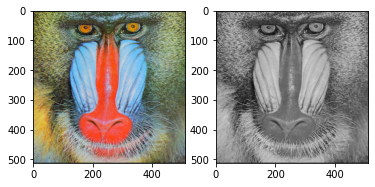

In [ ]:
# No.3 Luminance
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

grayscale_image = np.zeros(original.shape, original.dtype)

W = [0.21,0.72,0.07] # weights
W_mean = np.tensordot(original,W, axes=((-1,-1)))[...,None]
grayscale_image[:] = W_mean.astype(original.dtype)

f = plt.figure()

f.add_subplot(1,2, 1)
plt.imshow(original)

f.add_subplot(1,2, 2)
plt.imshow(grayscale_image)

plt.show(block=True)

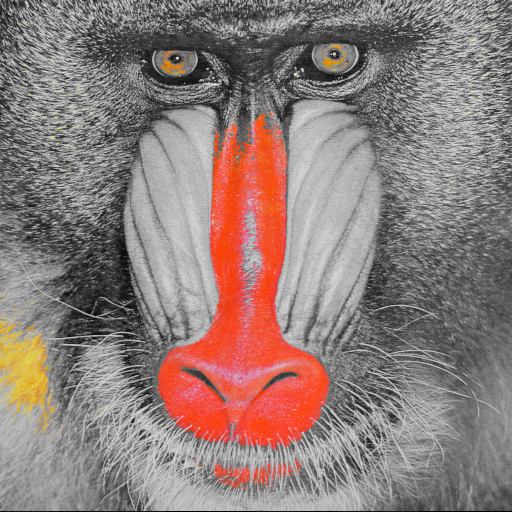

In [ ]:
# No.4

img = cv.imread('/content/drive/MyDrive/PCVK_GENAP2021/Images/mandrill.tiff')

# creating mask using thresholding over `red` channel (use better use histogram to get threshoding value)
# I have used 200 as thershoding value it can be different for different images
ret, mask = cv.threshold(img[:, :,2], 210, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `orange` region using `biteise_and`
orange = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-orange region
gray = cv.bitwise_and(img, 255 - mask3)

# orange masked output
out = gray + orange

cv2_imshow(out)